## Linguistic Evaluation

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import os

def process_and_plot_csv_data_with_base(file_paths, columns, eval_name, output_dir):
    # Initialize a DataFrame to store the data
    data = pd.DataFrame(columns=columns)

    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Read the last line of each file and append to the DataFrame
    for i, file_path in enumerate(file_paths):
        with open(file_path, 'r') as file:
            last_line = list(csv.reader(file))[-1]
            if i == 0:
                # Set the first file's last line as "base"
                data.loc["base"] = [float(val) for val in last_line]
            else:
                row_name = f"GEN{i-1}"
                data.loc[row_name] = [float(val) for val in last_line]

    # Save the DataFrame to a CSV file in the output directory
    output_csv_path = os.path.join(output_dir, f'summary_{eval_name}.csv')
    data.to_csv(output_csv_path, index=True)
    print(data)
    
    # Plot each column and save to the specified output directory
    
    for column in columns:
        plt.figure(figsize=(10, 5))
        plt.plot(data.index, data[column], marker='o')
        plt.title(f'{column} over Generations')
        plt.xlabel('Generation')
        plt.ylabel(column)
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        output_image_path = os.path.join(output_dir, f'{column}_plot.png')
        plt.savefig(output_image_path)
        plt.show()



In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import os

def process_and_plot_csv_data_with_legend(file_paths, columns, eval_name, output_dir):
    # Initialize a DataFrame to store the data
    data = pd.DataFrame(columns=columns)

    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Read the last line of each file and append to the DataFrame
    for i, file_path in enumerate(file_paths):
        with open(file_path, 'r') as file:
            last_line = list(csv.reader(file))[-1]
            if i == 0:
                # Set the first file's last line as "base"
                data.loc["base"] = [float(val) for val in last_line]
            else:
                row_name = f"GEN{i-1}"
                data.loc[row_name] = [float(val) for val in last_line]

    # Save the DataFrame to a CSV file in the output directory
    output_csv_path = os.path.join(output_dir, f'summary_{eval_name}.csv')
    data.to_csv(output_csv_path, index=True)
    print(data)
    
    # Plot each column and save to the specified output directory
    plt.figure(figsize=(12,6))
    for column in columns:
        plt.plot(data.index, data[column], marker='o', label=column)

    plt.title(f'{column} over Generations')
    plt.xlabel('Generation')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend(loc='lower right')
    plt.ylim(0,1.01)

    output_image_path = os.path.join(output_dir, f'{column}_plot.png')
    plt.savefig(output_image_path)
    plt.show()



      Distinct-2  Distinct-3  Self-BLEU    OV-TTR    MS-TTR  S-DIV-AV  \
base    0.999608    1.000000   1.000000  0.961854  0.980630  0.768293   
GEN0    0.973382    0.981486   0.999508  0.853721  0.937361  0.800968   
GEN1    0.986382    0.993807   0.999420  0.870570  0.949274  0.815035   
GEN2    0.969361    0.976282   0.999802  0.863324  0.928885  0.801276   
GEN3    0.986422    0.993631   0.998058  0.864618  0.949304  0.807336   
GEN4    0.976052    0.983941   0.999391  0.868769  0.935354  0.803510   
GEN5    0.982180    0.989105   0.998846  0.869561  0.941807  0.814022   
GEN6    0.967050    0.974404   0.999251  0.863423  0.928576  0.806840   
GEN7    0.989737    0.996980   0.998628  0.864802  0.949119  0.808072   

       S-DIV-C   SYN-DIV  
base  0.282428  0.551157  
GEN0  0.460437  0.803593  
GEN1  0.469541  0.796427  
GEN2  0.449132  0.783230  
GEN3  0.451102  0.778374  
GEN4  0.458173  0.798070  
GEN5  0.465983  0.798160  
GEN6  0.448525  0.779876  
GEN7  0.464778  0.797309  

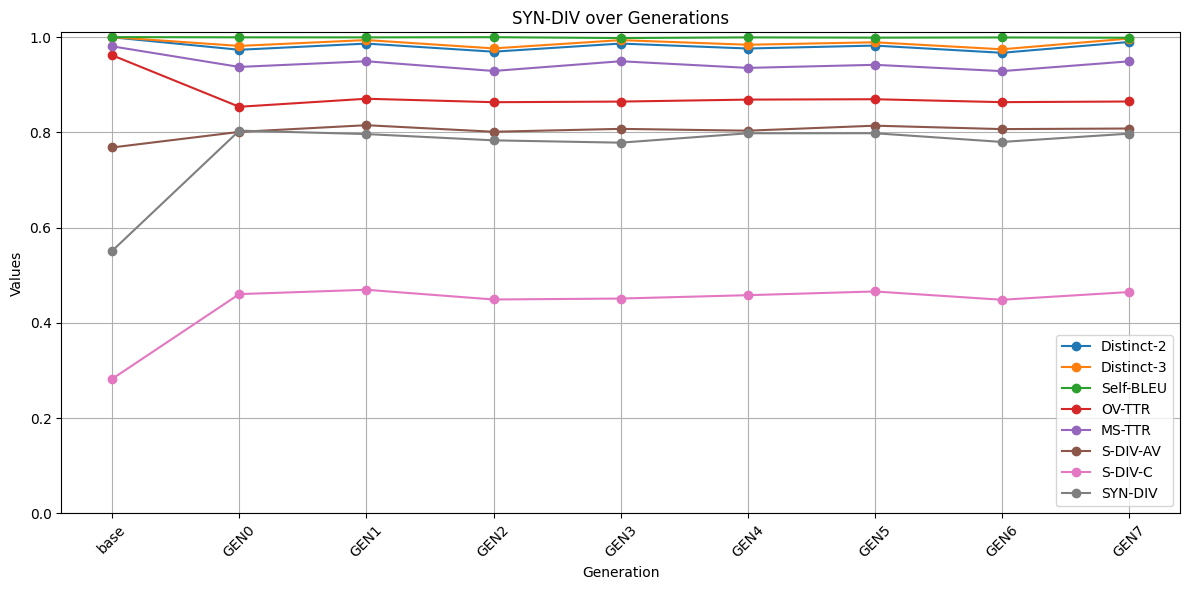

In [3]:
eval_files = [
    "outputs/base/eval_table_base.csv",
    "outputs/gen0/eval_table_gen0.csv",
    "outputs/gen1/eval_table_gen1.csv",
    "outputs/gen2/eval_table_gen2.csv",
    "outputs/gen3/eval_table_gen3.csv",
    "outputs/gen4/eval_table_gen4.csv",
    "outputs/gen5/eval_table_gen5.csv",
    "outputs/gen6/eval_table_gen6.csv",
    "outputs/gen7/eval_table_gen7.csv"
]

columns = ["Distinct-2", "Distinct-3", "Self-BLEU", "OV-TTR", "MS-TTR", "S-DIV-AV", "S-DIV-C", "SYN-DIV"]

#process_and_plot_csv_data_with_base(eval_files, columns, "linguistic", "evaluation" )
process_and_plot_csv_data_with_legend(eval_files, columns, "linguistic", "evaluation" )

## Creativity/Originality Evaluation

1. MS-Jaccard

This metric measures diversity by calculating the Jaccard similarity between the n-grams of each generated story and every other story in the dataset.  
Using a pseudocount of 0.5 is an interesting choice for your specific use case where the primary objective is to investigate the differences in similarity scores between various generations of synthetic text and a base of human texts. This choice is particularly insightful because it moderates the impact of n-grams that do not overlap between the sets, providing a more stable and "neutral" base score, rather than skewing the results dramatically towards zero. This could help in achieving a more balanced comparison across model generations.
Rationale for Using 0.5 as a Pseudocount

    Balanced Impact: A pseudocount of 0.5 helps in ensuring that missing n-grams don't completely nullify the similarity scores, but rather contribute a moderate base value to the geometric mean calculation. This is beneficial in cases where you expect some level of inherent dissimilarity due to generational changes in model outputs but want to prevent those differences from being exaggerated by zeros.
    Neutral Base Score: By setting the pseudocount to 0.5, the impact of each missing n-gram on the overall score is effectively neutralized, enabling a focus on the n-grams that do exist in both sets. This approach ensures that the similarity score reflects meaningful linguistic features present in both texts rather than being overly penalized for differences.  

2. Feature-based Similarity

We will use a pre-trained model (like BERT) to extract embeddings for the stories and then compute cosine similarities between these embeddings to measure how diverse the stories are in terms of semantic content.  

3. Fluency: This metric assesses the quantity of relevant ideas generated. In text, this can be translated to the number of relevant responses or ideas mentioned.

4. Flexibility: This measures the variety of ideas or categories used. In text, it evaluates how many different themes or subjects are touched upon.

5. Originality: This evaluates the uniqueness of the ideas relative to a typical response. It often requires a larger dataset to determine what counts as "typical."

### **Flexibility**
#### **Assisting Data** : Keywords Categories
First, we create a dictionary that organizes words from the RD test file into thematic categories. We follow a process of topic modeling or clustering. Topic modeling, specifically Latent Dirichlet Allocation (LDA), helps identify latent topics in text by clustering words that commonly appear together.
This method provides a basic categorization of the text into themes without explicit labels. Each topic will be named as topic_0, topic_1, etc., and the associated keywords represent the thematic categories.  
  
We intentionally employ the prompt file for this purpose, believing that this approach establishes a nuanced connection between the flexibility metric and the literary themes intended by the prompts. This connection enhances the metric's relevance, aligning it more closely with how a human would assess creative text.

### **Originality**
#### **Assisting Data** : Frequency Reference Corpus
We create a frequency reference corpus from the RD test source (containing human stories) calculating the frequency of each word. The frequencies will then be normalized to represent the proportion of each word's occurrence compared to the entire corpus.

      Jaccard-Sim-2  Feature-Based-Sim   Fluency  Flexibility  Originality
base       0.439042           0.735301  0.484900     0.585000     0.503361
GEN0       0.453897           0.892136  0.209343     0.940404     0.677486
GEN1       0.455242           0.909212  0.213700     0.948000     0.683446
GEN2       0.453492           0.890386  0.207280     0.942500     0.678460
GEN3       0.454371           0.899208  0.202130     0.935400     0.671259
GEN4       0.454027           0.888057  0.212320     0.944500     0.684917
GEN5       0.454580           0.893415  0.215470     0.952300     0.688121
GEN6       0.454106           0.878745  0.207580     0.926500     0.678552
GEN7       0.455053           0.897731  0.209720     0.947200     0.681224


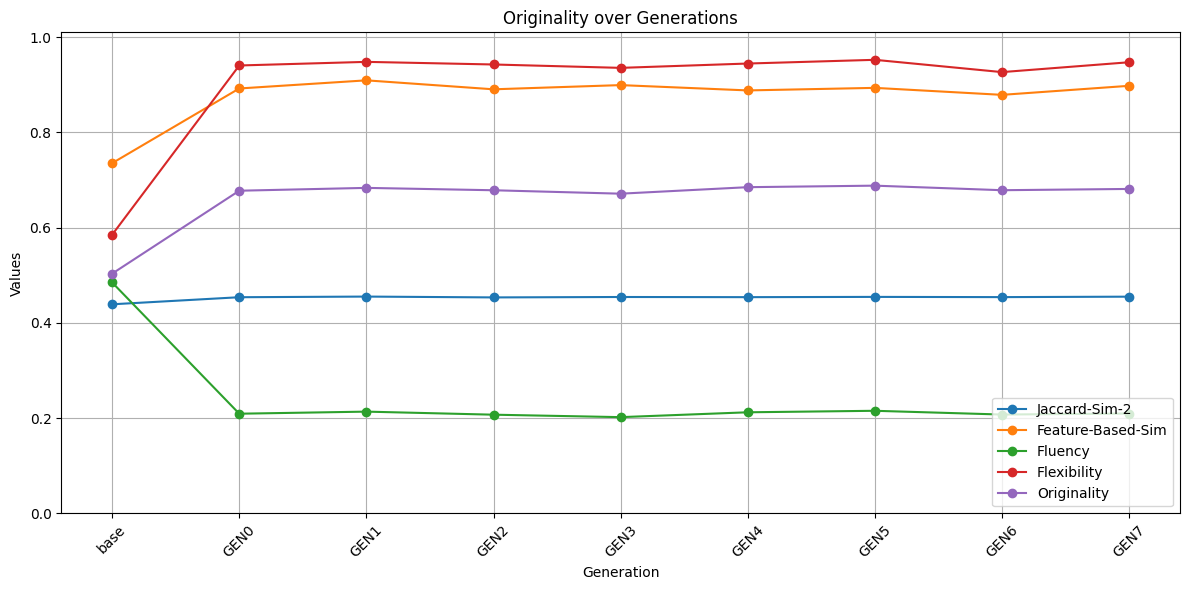

In [4]:
eval_files2 = [
    "outputs/base/eval_table_base_2.csv",
    "outputs/gen0/eval_table_gen0_2.csv",
    "outputs/gen1/eval_table_gen1_2.csv",
    "outputs/gen2/eval_table_gen2_2.csv",
    "outputs/gen3/eval_table_gen3_2.csv",
    "outputs/gen4/eval_table_gen4_2.csv",
    "outputs/gen5/eval_table_gen5_2.csv",
    "outputs/gen6/eval_table_gen6_2.csv",
    "outputs/gen7/eval_table_gen7_2.csv"
]

columns2 = ["Jaccard-Sim-2", "Feature-Based-Sim", "Fluency", "Flexibility", "Originality"]

#process_and_plot_csv_data_with_base(eval_files2, columns2, "creativity", "evaluation")
process_and_plot_csv_data_with_legend(eval_files2, columns2, "creativity", "evaluation")